#TEST MODEL

In [1]:
import tensorflow as tf
from google.colab import files

model = files.upload()

Saving 2mobilenetv2_2.h5 to 2mobilenetv2_2.h5


In [2]:
import math
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# Change file model name
model_name = list(model.keys())[0]
new_test_name = 'model.h5'
os.rename(model_name, new_test_name)

In [4]:
!pip install gdown
!gdown --id 1oykAHmeAENmHANmwijWfU33X1QE7E_TV
# Unzip the file
!unzip -q test2.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oykAHmeAENmHANmwijWfU33X1QE7E_TV
To: /content/test2.zip
100% 24.0M/24.0M [00:00<00:00, 70.0MB/s]


In [5]:
model = load_model('model.h5')
TEST_DIR = '/content/test2'
motivs = {'Batik Betawi': 0, 'Batik Blekok': 1, 'Batik Cendrawasih': 2, 'Batik Geblek Renteng': 3, 'Batik Kawung': 4, 'Batik Lasem': 5, 'Batik Megamendung': 6, 'Batik Parang': 7, 'Batik Poleng': 8, 'Batik Sekar Jagad': 9}

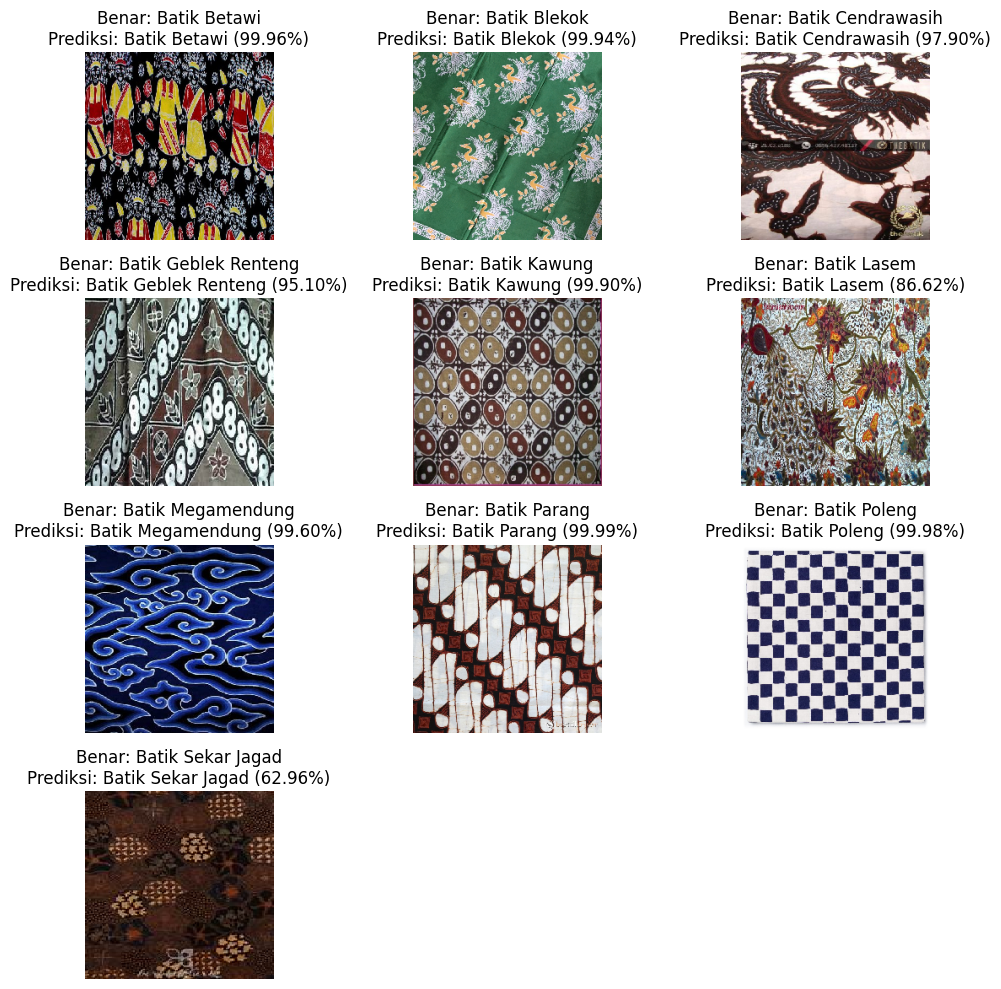

In [9]:
num_columns = 3
num_rows = math.ceil(len(motivs.keys()) / num_columns)

plt.figure(figsize=(10, 10))

for i, motive in enumerate(motivs.keys()):
    images_list = os.listdir(os.path.join(TEST_DIR, motive))
    sample_image = random.choice(images_list)
    img_path = os.path.join(TEST_DIR, motive, sample_image)
    img = load_img(img_path, target_size=(224, 224))

    img_array = img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array, verbose=0)
    pred_idx = np.argmax(prediction)
    pred_motive = list(motivs.keys())[pred_idx]
    pred_confidence = prediction[0][pred_idx] * 100

    # Tambahkan subplot untuk setiap gambar
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(img)
    # Tambahkan label yang benar dan prediksi ke judul
    plt.title(f'Benar: {motive}\nPrediksi: {pred_motive} ({pred_confidence:.2f}%)')
    plt.axis('off')

plt.tight_layout()
plt.show()

#Dengan Validation


In [ ]:
!pip install gdown
!gdown --id 1my5Xr0NSYaEsgwaDEG9HkaK1LOlNsnFJ

# Unzip the file
!unzip -q dataset2.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1my5Xr0NSYaEsgwaDEG9HkaK1LOlNsnFJ
From (redirected): https://drive.google.com/uc?id=1my5Xr0NSYaEsgwaDEG9HkaK1LOlNsnFJ&confirm=t&uuid=52704506-94a6-427b-bdfe-bb42ab5feb9f
To: /content/dataset2.zip
100% 810M/810M [00:13<00:00, 61.1MB/s]


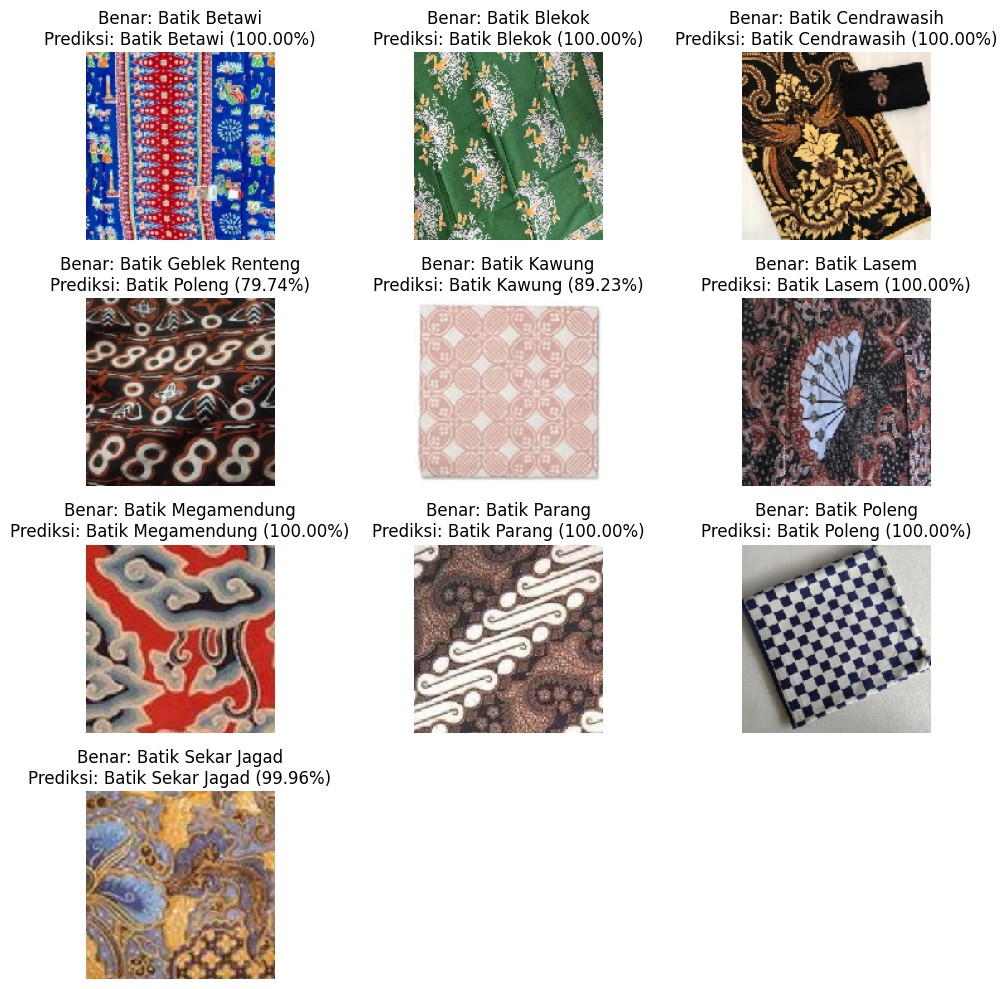

In [ ]:
VALIDATION_DIR = '/content/dataset/TEST'
num_columns = 3
num_rows = math.ceil(len(motivs.keys()) / num_columns)

plt.figure(figsize=(10, 10))

for i, motive in enumerate(motivs.keys()):
    images_list = os.listdir(os.path.join(VALIDATION_DIR, motive))
    sample_image = random.choice(images_list)
    img_path = os.path.join(VALIDATION_DIR, motive, sample_image)
    img = load_img(img_path, target_size=(150, 150))

    img_array = img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array, verbose=0)
    pred_idx = np.argmax(prediction)
    pred_motive = list(motivs.keys())[pred_idx]
    pred_confidence = prediction[0][pred_idx] * 100

    # Tambahkan subplot untuk setiap gambar
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(img)
    # Tambahkan label yang benar dan prediksi ke judul
    plt.title(f'Benar: {motive}\nPrediksi: {pred_motive} ({pred_confidence:.2f}%)')
    plt.axis('off')

plt.tight_layout()
plt.show()